# Student Achievement Regression 

This is a unique notebook given by the merging of different notebooks.

Git repo: https://github.com/gabryallaseconda/SupervisedLearningModelComparision_CUBoulder.git


## Dataset description

**Source:** https://archive.ics.uci.edu/dataset/320/student+performance

**Description:**
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In this project I consider only the first dataset. 

**Attributes:**
1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

**Targets:**
1.  G1 - first period grade (numeric: from 0 to 20)
2.  G2 - second period grade (numeric: from 0 to 20)
3.  G3 - final grade (numeric: from 0 to 20, output target)

**Goal:**
Regression on G3, without using G1 or G2.



## Packages

In [1]:
from collections import Counter
import random

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns



import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import cross_val_score, KFold, GridSearchCV


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from catboost import CatBoostRegressor

## Types and missing values

All the columns are readed in the correct format. 

No incomplete information is found.

In [2]:
df = pd.read_csv("student-mat.csv", sep = ";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.shape

(395, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df = df.drop(['G1', 'G2'], axis = 1)

In [6]:
columns_numerical = df.select_dtypes(include=['int', 'float']).columns
print("Numerical Columns:")
print(columns_numerical)

columns_categorical = df.select_dtypes(include=['object']).columns
print("Categorical Columns")
print(columns_categorical)

Numerical Columns:
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3'],
      dtype='object')
Categorical Columns
Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


### One hot encoding

In [7]:
df[columns_categorical]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [8]:
# Look at possible values
df['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [9]:
df['school'] = df['school'].apply(lambda x: 1 if x == 'GB' else 0)
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)
df['address'] = df['address'].apply(lambda x: 1 if x == 'U' else 0)
df['famsize'] = df['famsize'].apply(lambda x: 1 if x == 'GT3' else 0)
df['Pstatus'] = df['Pstatus'].apply(lambda x: 1 if x == 'A' else 0)

for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)



In [10]:

columns_base_value = {'Mjob': 'other',
                    'Fjob': 'other',
                    'reason': 'other',	
                    'guardian': 'other',}

# Iterate over specified columns and perform one-hot encoding
for column, base_value in columns_base_value.items():
    
    # Perform one-hot encoding and 
    encoded_cols = pd.get_dummies(df[column], prefix=column).drop(f"{column}_{base_value}", axis=1)
    
    # Concatenate with the original DataFrame
    df = pd.concat([df, encoded_cols.astype(int)], axis=1)

    # Drop the original column
    df.drop(column, axis=1, inplace=True)
    

In [11]:
columns_categorical = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_reputation', 'guardian_father',
       'guardian_mother']

columns_categorical_binary = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']

columns_categorical_multi = ['Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_reputation', 'guardian_father',
       'guardian_mother']

## Outliers

No outliers in this dataset :)

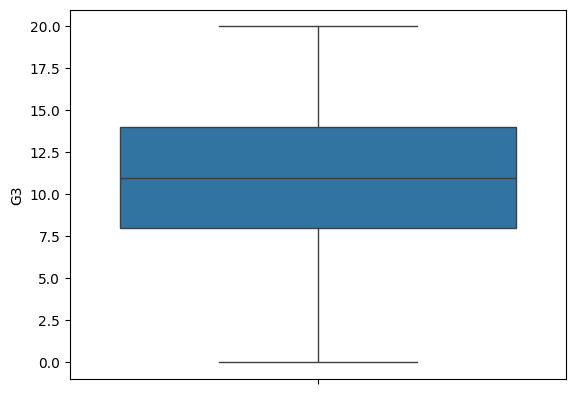

In [12]:
sns.boxplot(data=df['G3'])
plt.show()

## Statistics

In [13]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
count,395.0,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.0,0.473418,16.696203,0.777215,0.711392,0.103797,2.749367,2.521519,1.448101,2.035443,...,0.146835,0.050633,0.045570,0.281013,0.073418,0.367089,0.275949,0.265823,0.227848,0.691139
std,0.0,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,...,0.354391,0.219525,0.208814,0.450064,0.261152,0.482622,0.447558,0.442331,0.419976,0.462610
min,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,16.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,17.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.0,1.000000,18.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,0.0,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Pairplots

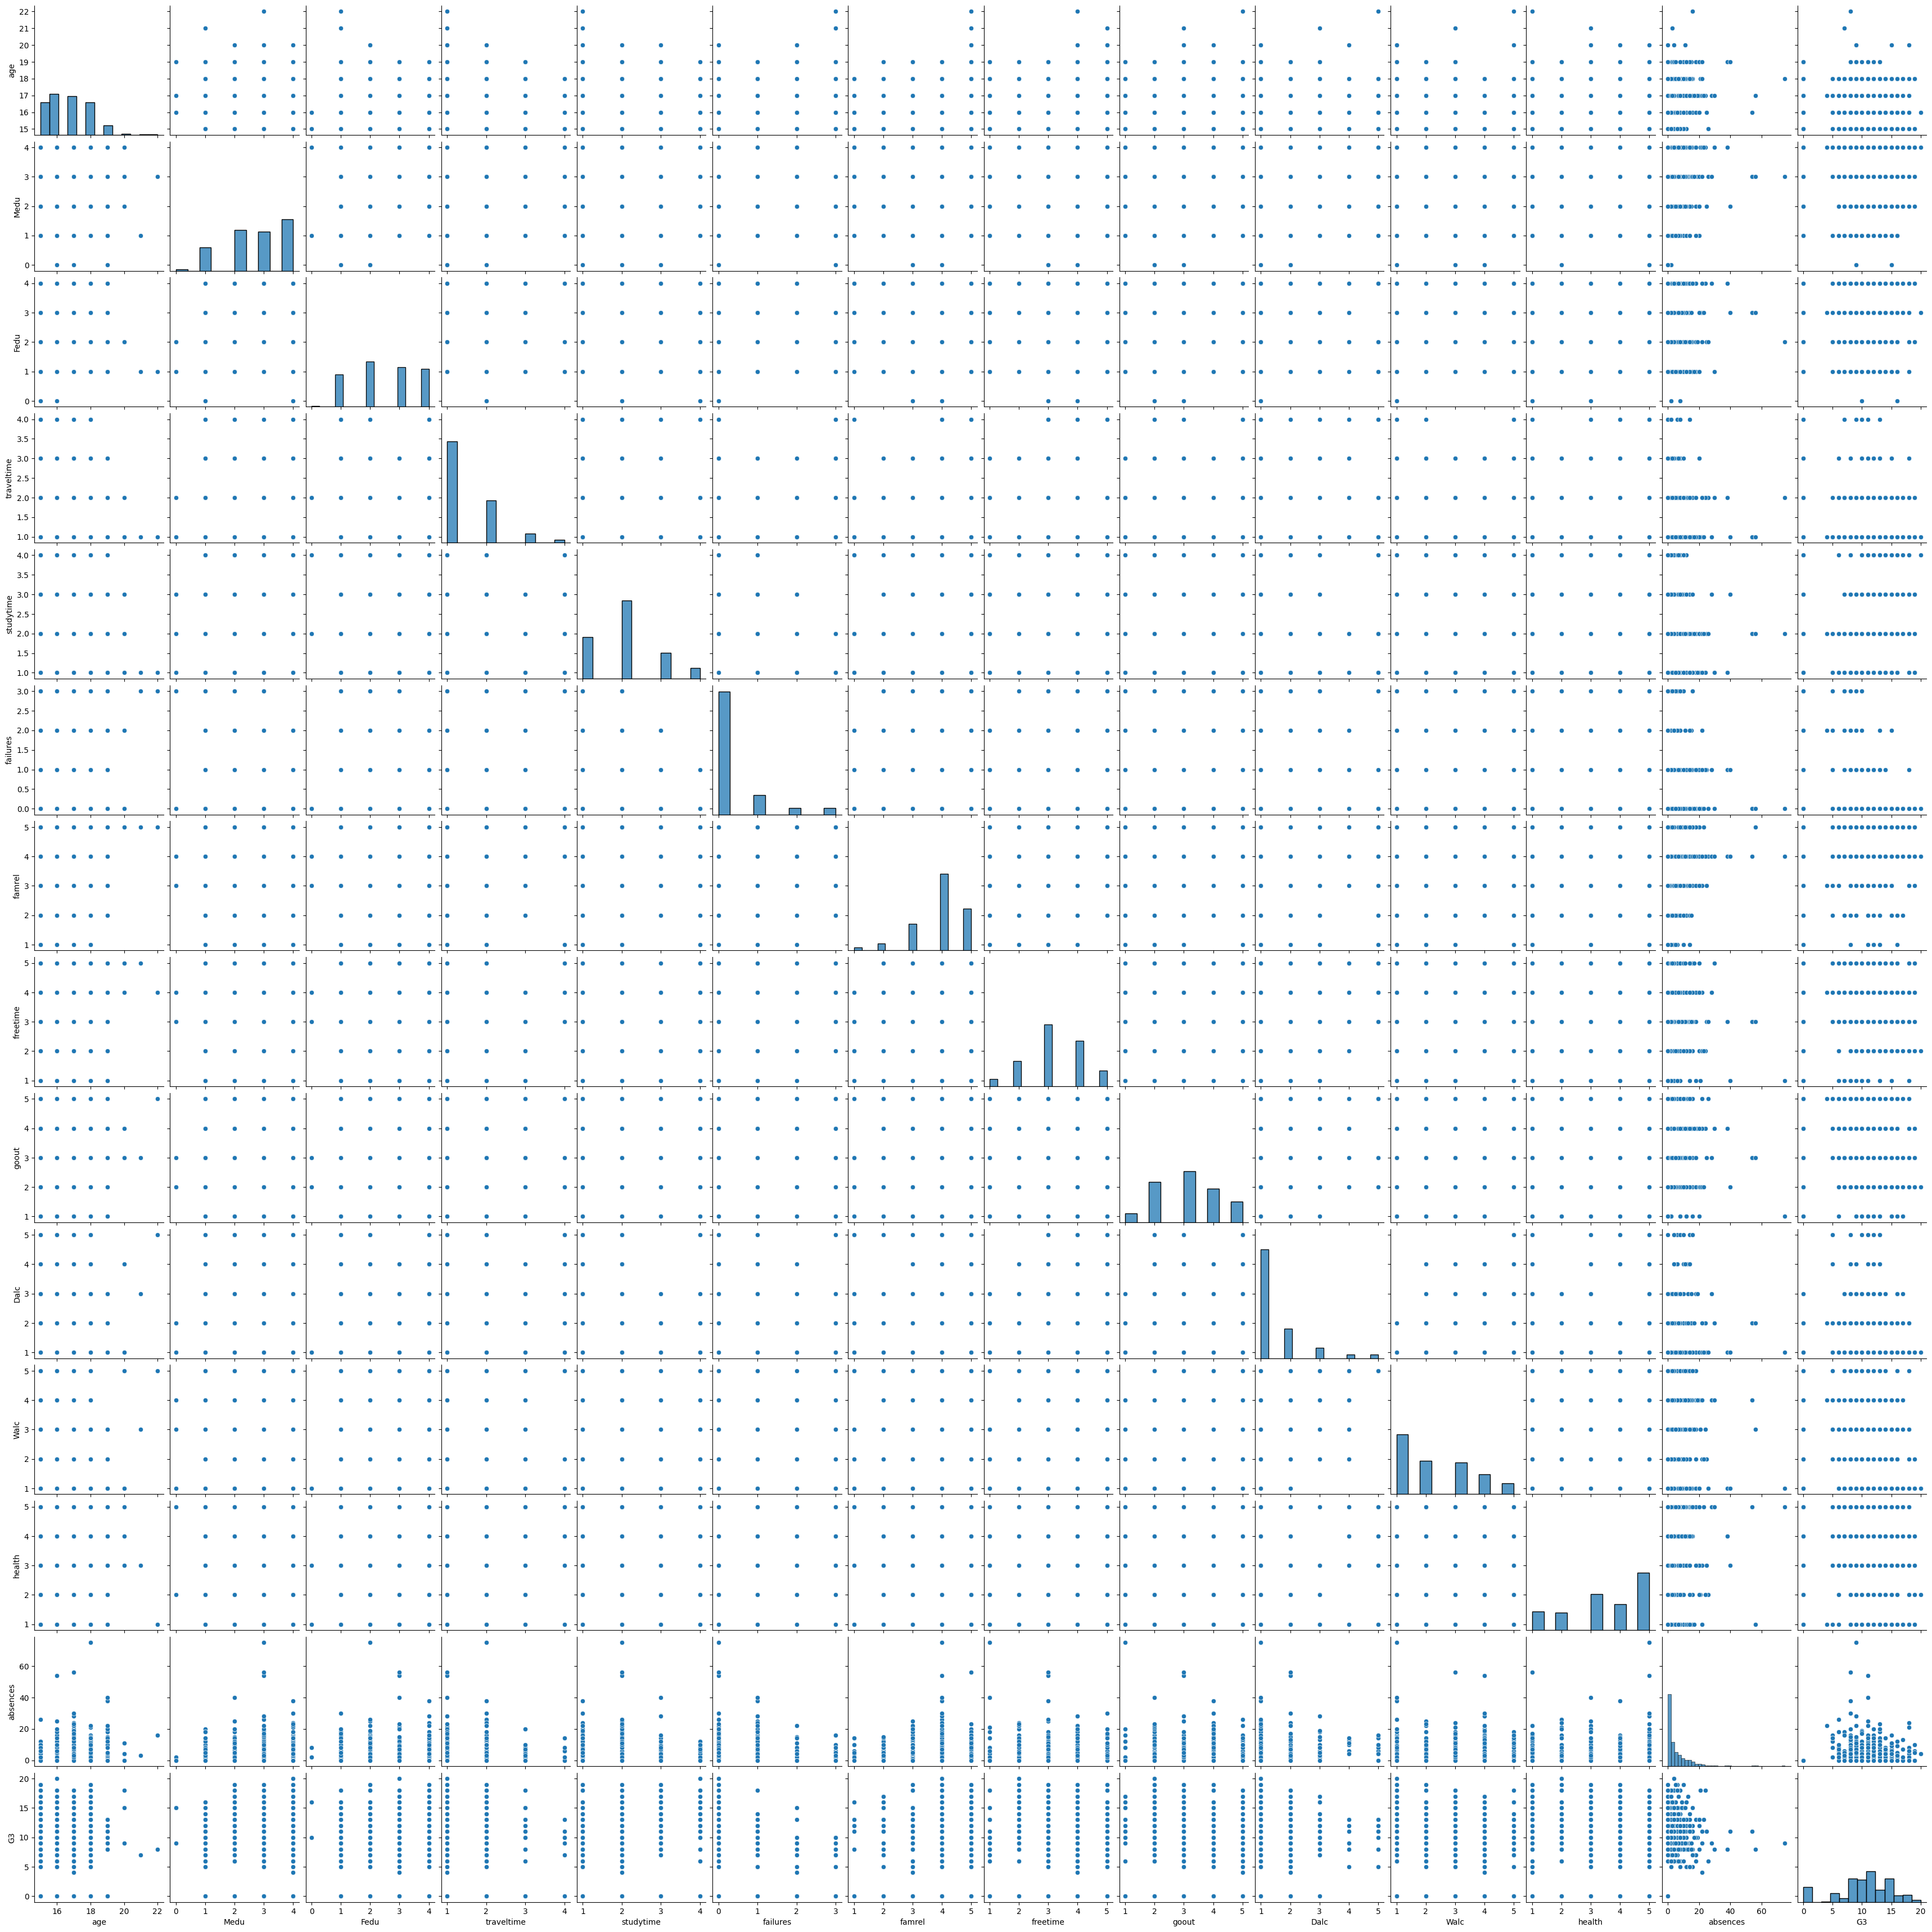

In [14]:
# Pair plot for multivariate relationships
sns.pairplot(df[columns_numerical])
plt.show()

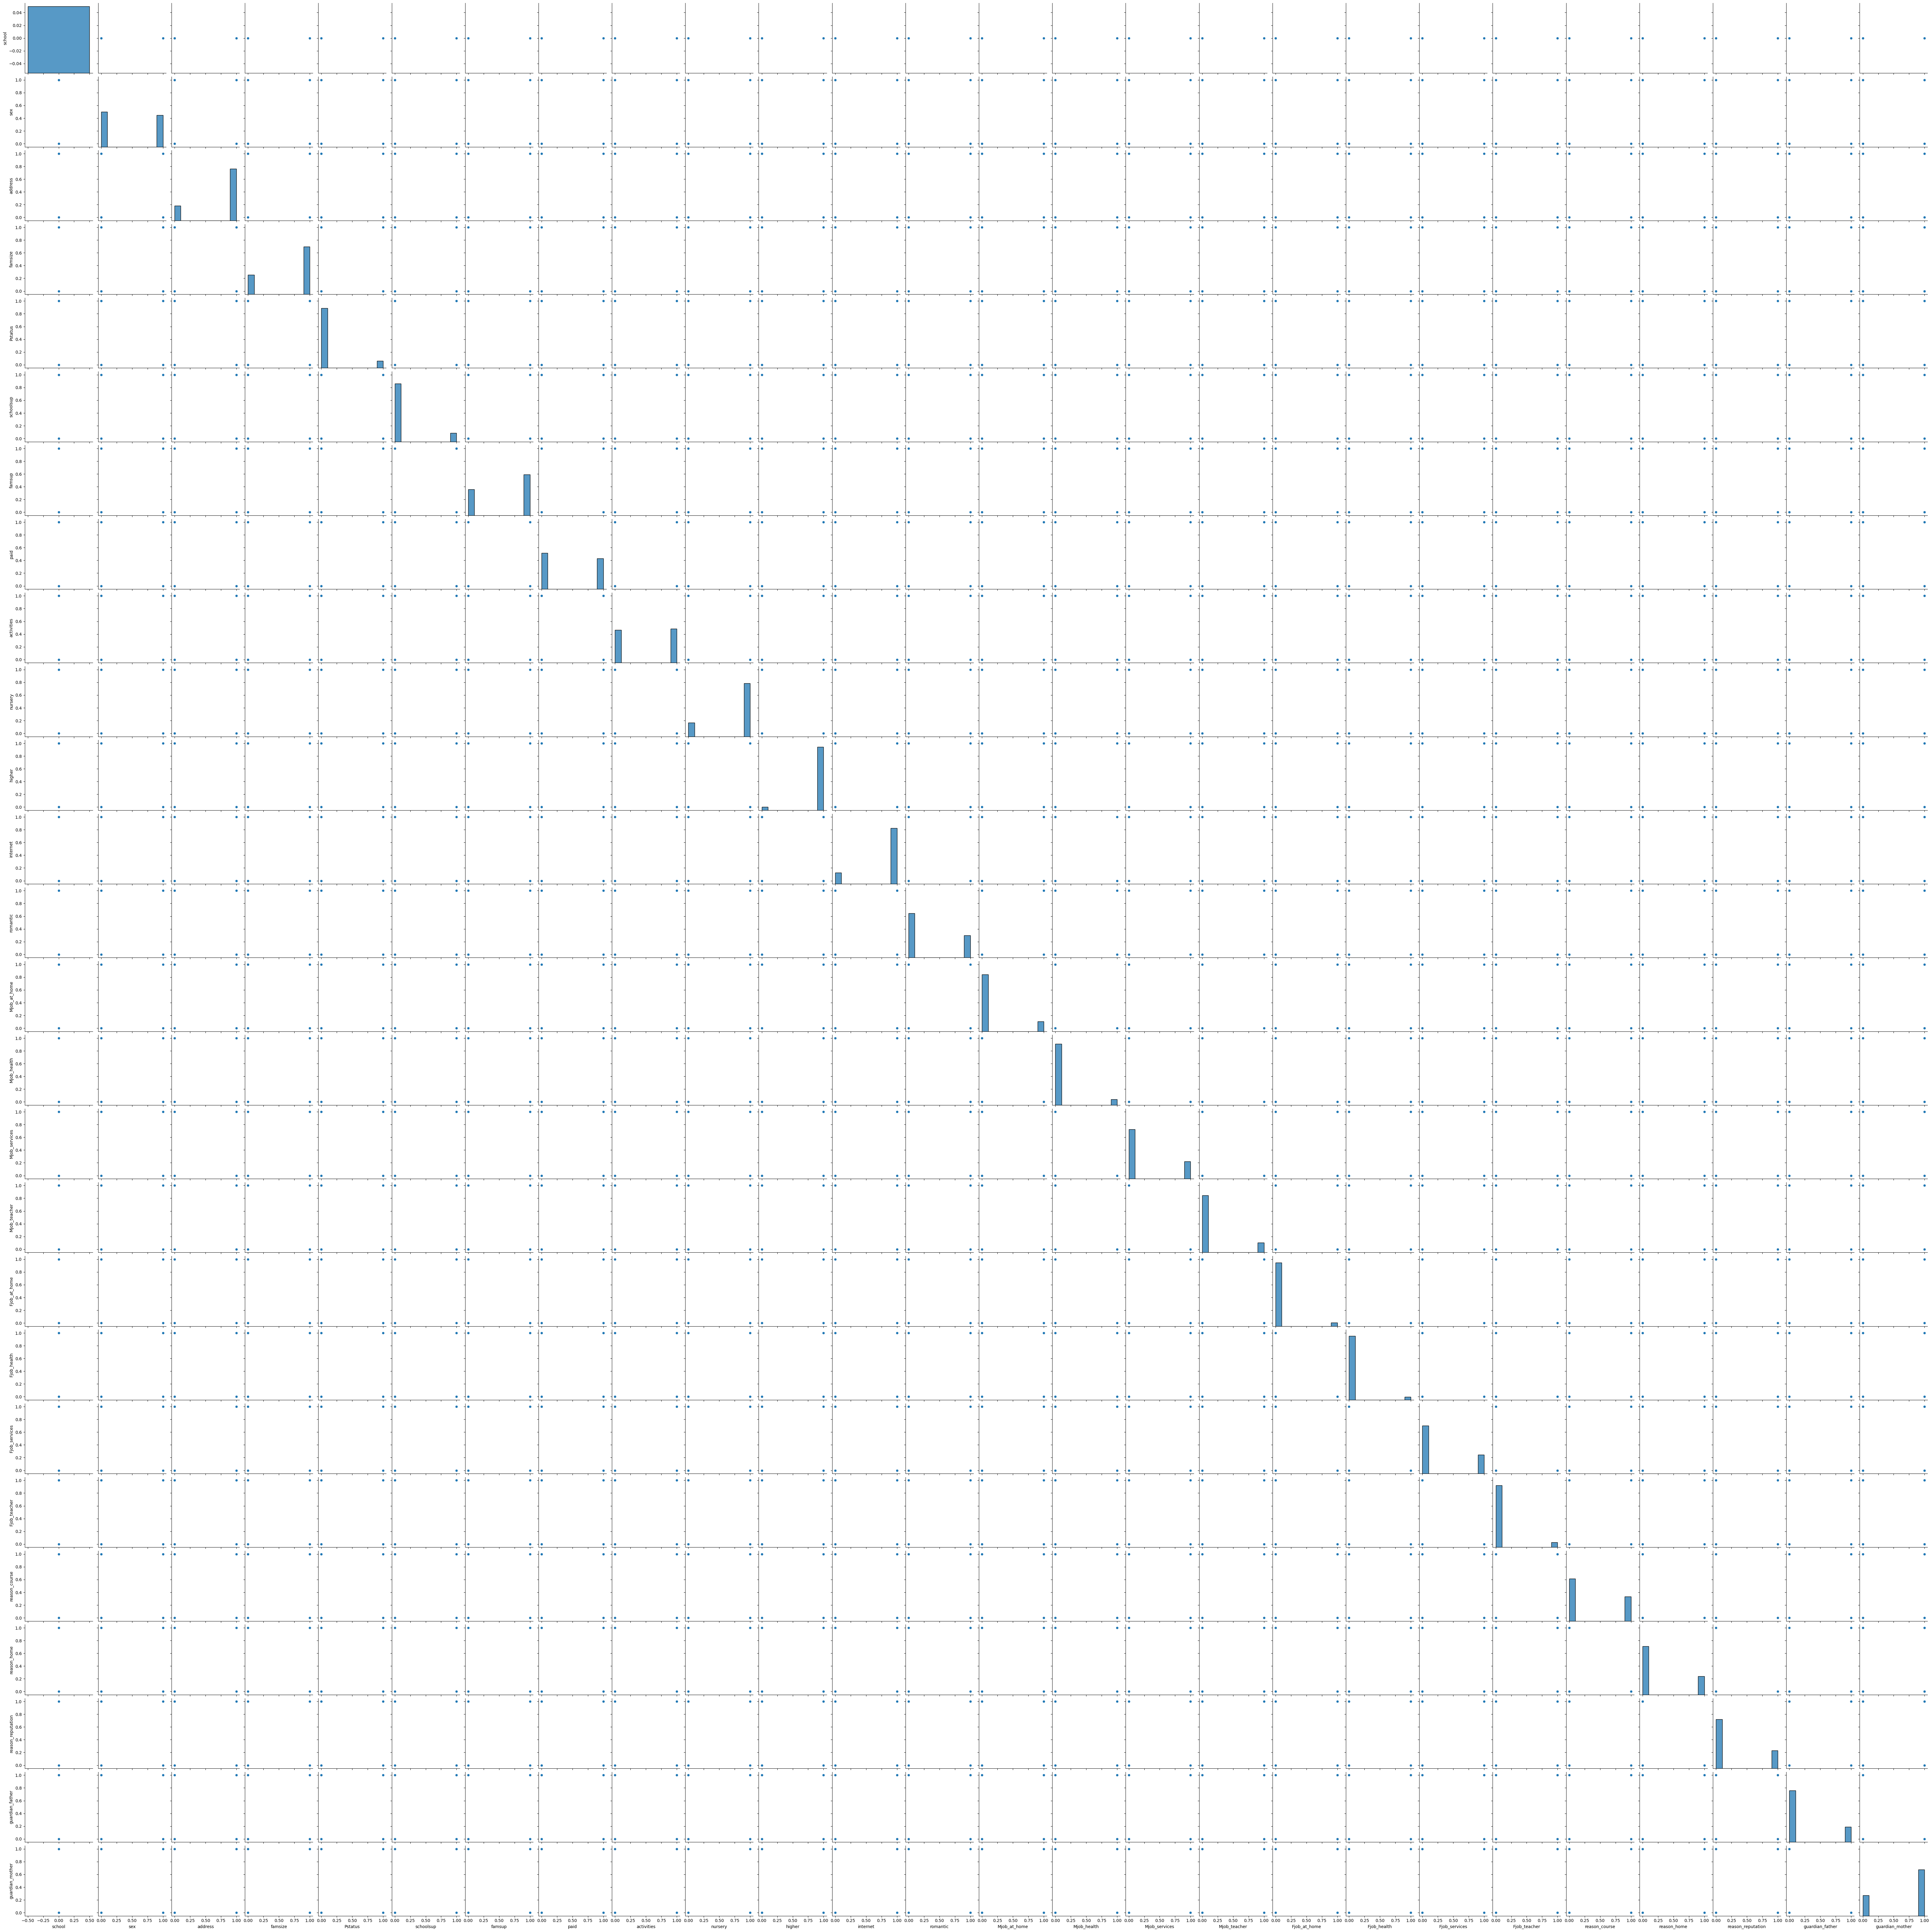

In [15]:
# Pair plot for multivariate relationships
sns.pairplot(df[columns_categorical])
plt.show()

### Correlation

**numericals**

Light negative correlation between numerical variables.

Medu/Fedu highly correlated

goout/Dalc/Galc highly correlated

Good correlation with target G3 (> .05): -age, Medu, Fedu, -traveltime, studytime, -failures, famrel, -goout, -Dalc, -Walc, -health

**categoricals**

Light negatively correlation between categorical valirables.

famsup/paid light correlation

internet/address light correlation

Good correlation with target G3 (> .05): 

(binary) sex, address, -famsize, Pstatus, schoolsup, paid, nursery, higher, internet, -romantic

(multy) Mjob, Fjob, reason


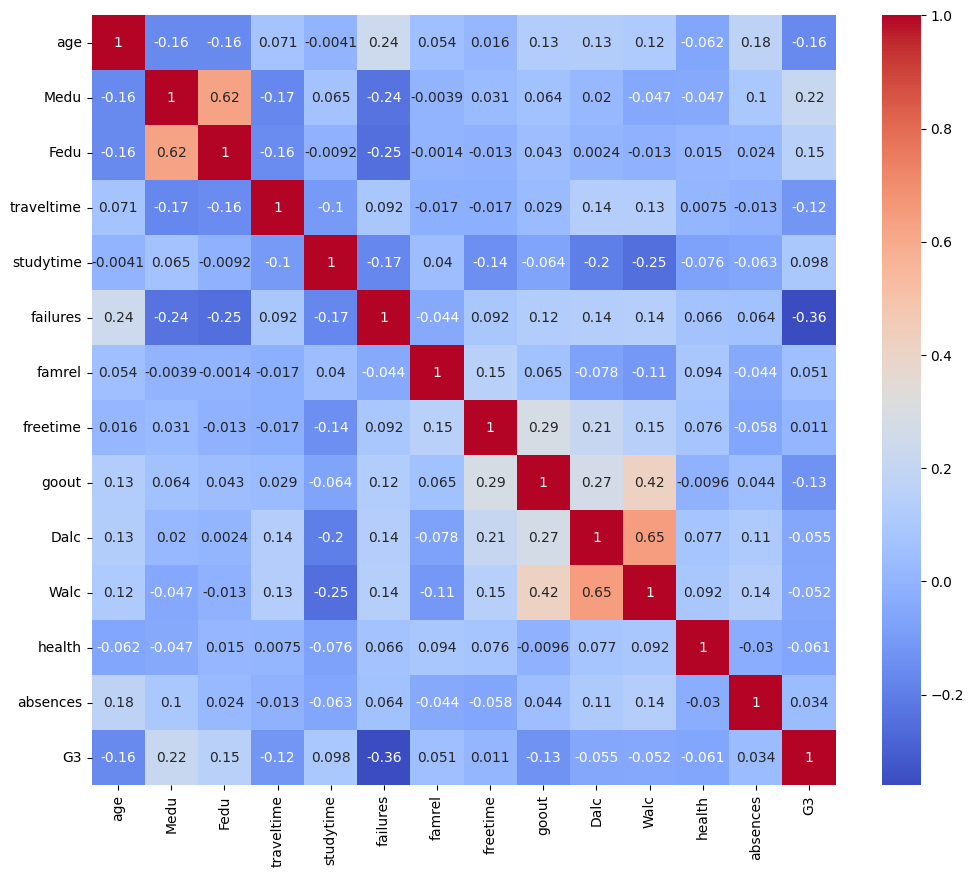

In [16]:
correlation_matrix = df[columns_numerical].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


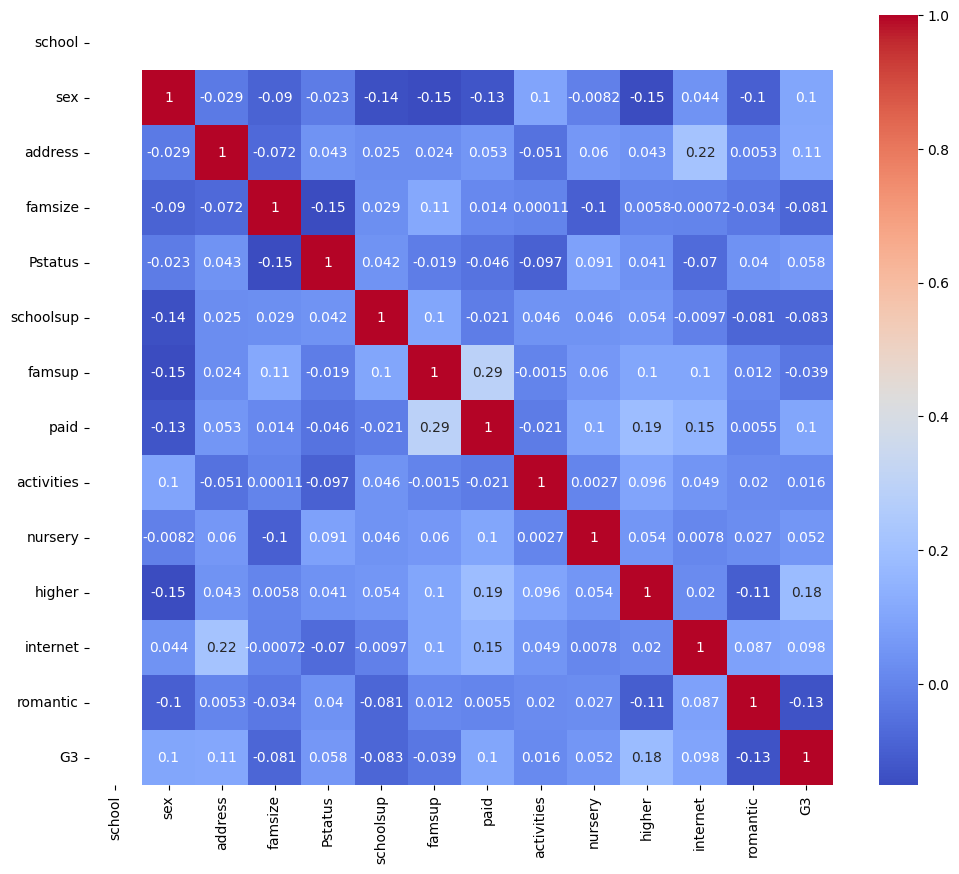

In [17]:
correlation_matrix = df[columns_categorical_binary + ['G3']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


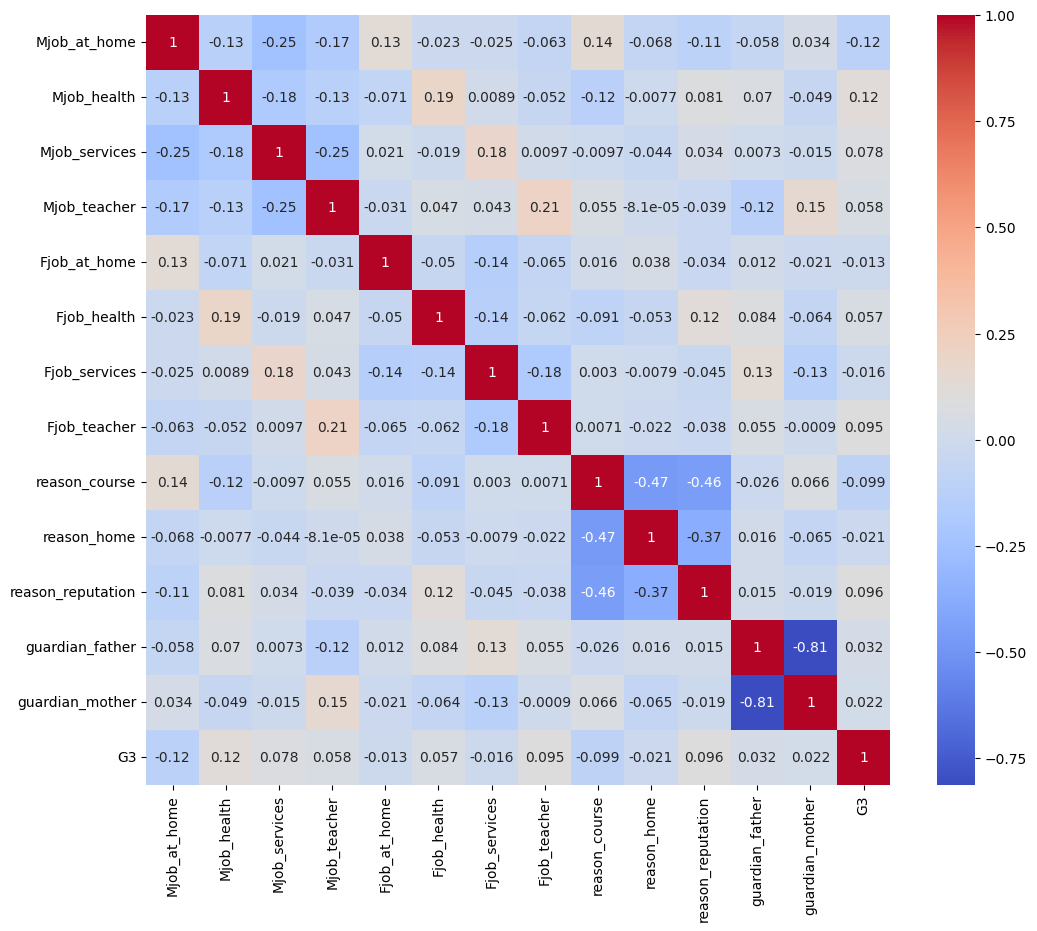

In [18]:
correlation_matrix = df[columns_categorical_multi + ['G3']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Feature selection

Keep only the features haveing some correlation with the target G3.

Some features are still correlated between them.

### Avoid collinearity

In [19]:
# Create new columns for max, min, and average
df['Max'] = df[['Medu', 'Fedu']].max(axis=1)
df['Min'] = df[['Medu', 'Fedu']].min(axis=1)
df['Average'] = df[['Medu', 'Fedu']].mean(axis=1)

# Calculate the correlation of new columns with the target variable
correlation_max = df['Max'].corr(df['G3'])
correlation_min = df['Min'].corr(df['G3'])
correlation_average = df['Average'].corr(df['G3'])

# Display the resulting DataFrame and correlations
print("Correlation Max:", correlation_max)
print("Correlation Min:", correlation_min)
print("Correlation Average:", correlation_average)

df['Pedu'] = df['Max']

Correlation Max: 0.2313264038050374
Correlation Min: 0.15577250625315417
Correlation Average: 0.2052244341145388


In [20]:
# Create new columns for max, min, and average
df['Max'] = df[['goout', 'Dalc', 'Walc']].max(axis=1)
df['Min'] = df[['goout', 'Dalc', 'Walc']].min(axis=1)
df['Average'] = df[['goout', 'Dalc', 'Walc']].mean(axis=1)

# Calculate the correlation of new columns with the target variable
correlation_max = df['Max'].corr(df['G3'])
correlation_min = df['Min'].corr(df['G3'])
correlation_average = df['Average'].corr(df['G3'])

# Display the resulting DataFrame and correlations
print("Correlation Max:", correlation_max)
print("Correlation Min:", correlation_min)
print("Correlation Average:", correlation_average)

df['gooutAlc'] = df['Max']

Correlation Max: -0.14230052656156147
Correlation Min: -0.06237355580329179
Correlation Average: -0.10019155564480733


In [21]:
# Create new columns for max, min, and average
df['Max'] = df[['address', 'internet']].max(axis=1)
df['Min'] = df[['address', 'internet']].min(axis=1)
df['Average'] = df[['address', 'internet']].mean(axis=1)

# Calculate the correlation of new columns with the target variable
correlation_max = df['Max'].corr(df['G3'])
correlation_min = df['Min'].corr(df['G3'])
correlation_average = df['Average'].corr(df['G3'])

# Display the resulting DataFrame and correlations
print("Correlation Max:", correlation_max)
print("Correlation Min:", correlation_min)
print("Correlation Average:", correlation_average)

df['addressInternet'] = df['Min']

Correlation Max: 0.05524657709485538
Correlation Min: 0.14282448447070212
Correlation Average: 0.1310493096203414


In [22]:
choosen_columns = ['age', 'Pedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'gooutAlc', 'health', 
       'sex', 'addressInternet', 'famsize', 'Pstatus', 'schoolsup', 'paid',  'nursery', 'higher', 'romantic', 'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_reputation',
       'G3']



In [23]:
df = df[choosen_columns]

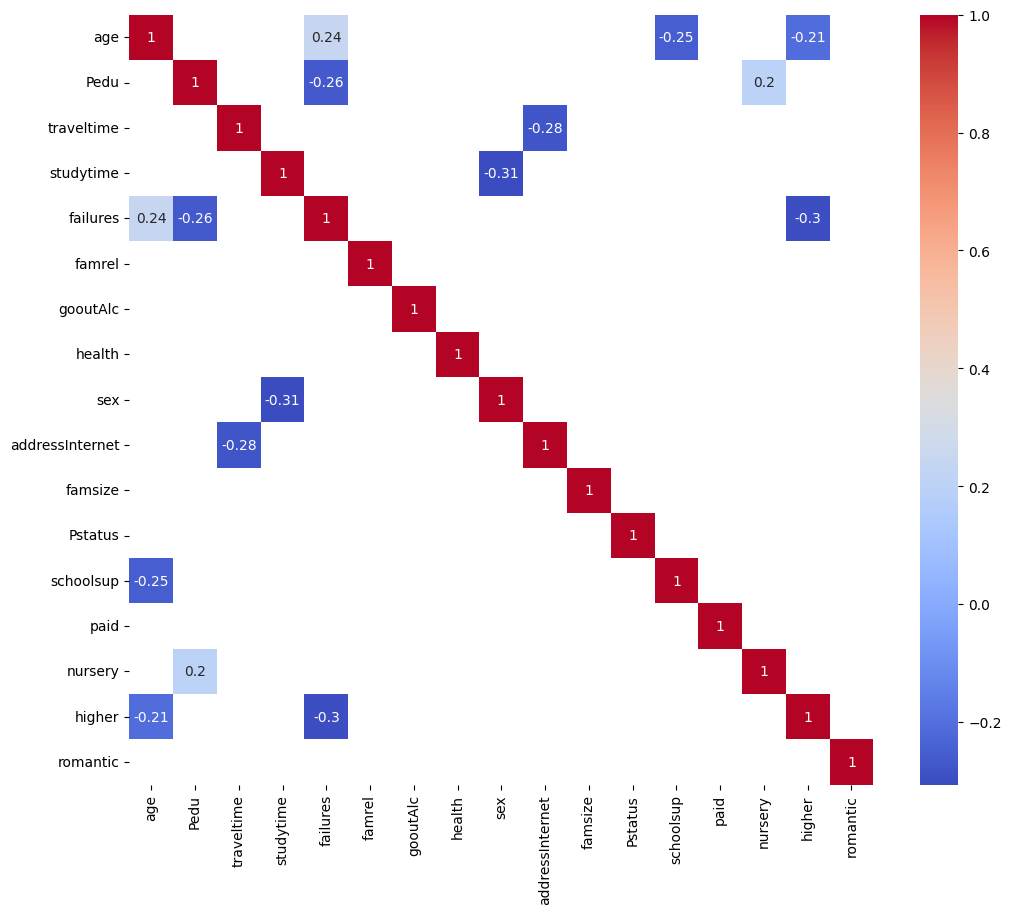

In [24]:

correlation_matrix = df[[x for x in choosen_columns if x not in columns_categorical_multi + ['G3']]].corr()
mask = (correlation_matrix > 0.2) | (correlation_matrix < -0.2)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=~mask)
plt.show()

Observations in the correlations:
 - Female have less studytime
 - Greater the age, the less one wants to get higher education, the less take extra educational support
 - Negative correlation between address/internet and traveltime, this because address indicates rural area
 - Failures is negative correlated with higher education desire and parent education, but positively correlated with age
 - Educated parents tends to send sons to nursery school

In [25]:
df.columns

Index(['age', 'Pedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'gooutAlc', 'health', 'sex', 'addressInternet', 'famsize', 'Pstatus',
       'schoolsup', 'paid', 'nursery', 'higher', 'romantic', 'Mjob_at_home',
       'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_reputation', 'G3'],
      dtype='object')

## Standardization

In [26]:
columns_to_standardize = [x for x in choosen_columns if x in columns_numerical] + ['Pedu', 'gooutAlc'] 
columns_to_standardize.remove('G3')


for column in columns_to_standardize:
    mean = df[column].mean()
    std = df[column].std()
    df[column] = (df[column] - mean) / std



## Dataset Split

In [27]:
test_proportion = .2

# Shuffle the rows
shuffled_df = df.sample(frac=1, random_state=123)

# Calculate the index to split at
split_index = int(1-test_proportion * len(shuffled_df))  

# Split the DataFrame into training and testing sets
train_df = shuffled_df[:split_index]
test_df = shuffled_df[split_index:]

In [28]:
shuffled_df.head()

,age,Pedu,traveltime,studytime,failures,famrel,gooutAlc,health,sex,addressInternet,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,G3
252,1.021751,-0.940091,-0.642435,-1.233786,0.895343,-1.053136,1.570863,1.039751,1,1,...,1,0,0,0,1,0,0,0,0,8
236,0.238078,-0.940091,-0.642435,-0.042232,-0.449374,0.062115,1.570863,0.320484,1,1,...,0,0,0,0,0,0,0,1,0,13
275,0.238078,-0.940091,0.791247,-0.042232,-0.449374,0.062115,0.657033,1.039751,0,1,...,1,0,0,0,0,0,1,0,0,12
148,-0.545595,1.024650,-0.642435,-1.233786,-0.449374,-1.053136,-1.170628,1.039751,1,1,...,0,1,0,0,0,1,1,0,0,0
309,1.805423,-1.922461,-0.642435,-0.042232,0.895343,0.062115,-0.256798,-0.398784,0,1,...,0,0,0,0,0,0,0,0,1,10


In [29]:
train_df.shape

(317, 29)

In [30]:
train_df.to_csv("train_df.csv", index = False)
test_df.to_csv("test_df.csv", index = False)

## Experiment: PCA

In [31]:
import numpy as np

from sklearn.decomposition import PCA

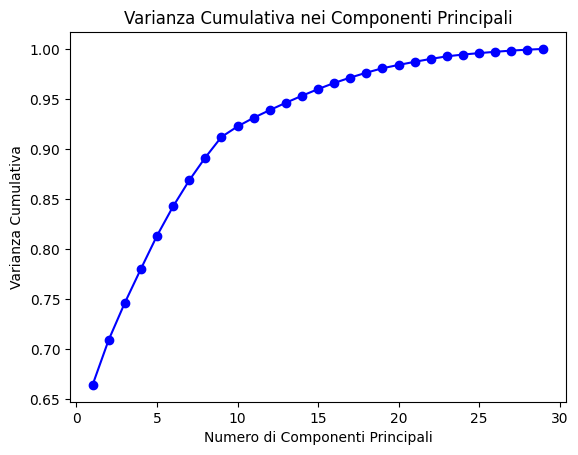

In [32]:
pca = PCA()
pca_result = pca.fit_transform(df)

# Creazione del grafico con le varianze cumulative
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

pca_result.shape
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Varianza Cumulativa nei Componenti Principali')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Cumulativa')
plt.show()

# Linear Model Regressions

## Import Data

In [33]:
df = pd.read_csv('train_df.csv')
df.head()

,age,Pedu,traveltime,studytime,failures,famrel,gooutAlc,health,sex,addressInternet,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,G3
0,1.021751,-0.940091,-0.642435,-1.233786,0.895343,-1.053136,1.570863,1.039751,1,1,...,1,0,0,0,1,0,0,0,0,8
1,0.238078,-0.940091,-0.642435,-0.042232,-0.449374,0.062115,1.570863,0.320484,1,1,...,0,0,0,0,0,0,0,1,0,13
2,0.238078,-0.940091,0.791247,-0.042232,-0.449374,0.062115,0.657033,1.039751,0,1,...,1,0,0,0,0,0,1,0,0,12
3,-0.545595,1.024650,-0.642435,-1.233786,-0.449374,-1.053136,-1.170628,1.039751,1,1,...,0,1,0,0,0,1,1,0,0,0
4,1.805423,-1.922461,-0.642435,-0.042232,0.895343,0.062115,-0.256798,-0.398784,0,1,...,0,0,0,0,0,0,0,0,1,10


In [34]:
X = df.drop(['G3'], axis = 1)
y = df[['G3']]

## Feature selection via backward elimination using p-value

In [35]:
def majority_vote_with_random_tie_breaking(strings):
    counts = Counter(strings)
    
    max_count = max(counts.values())
    majority_strings = [string for string, count in counts.items() if count == max_count]

    result = random.choice(majority_strings)
    
    return result

In [36]:

kf = KFold(n_splits=8, shuffle=False, random_state=None)

features = list(X.columns)

rsquared_history = []

for i in range(26):
    print(f'\t Current features: {features}')
    # Create the correct formula
    formula = 'G3 ~ '
    for feature in features:
        formula += str(feature)+' + '    
    formula = formula[:-3]
    
    rsquared_values = []
    largest_pvalue_features = []
    
    for train_index, test_index in kf.split(df):
        train_data = df.iloc[train_index]
        test_data = df.iloc[test_index]

        model = sm.OLS.from_formula(formula, data=train_data).fit()
        
        y_test_pred = model.predict(test_data)
        y_test_actual = test_data['G3']
        ss_total = ((y_test_actual - y_test_actual.mean())**2).sum()
        ss_residual = ((y_test_actual - y_test_pred)**2).sum()
        rsquared = 1 - (ss_residual / ss_total)

        rsquared_values.append(rsquared)
        largest_pvalue_features.append(model.pvalues.drop('Intercept').idxmax())
        
    rsquared = sum(rsquared_values)/8
    largest_pvalue_feature = majority_vote_with_random_tie_breaking(largest_pvalue_features)

    print(f'Model r2: {rsquared}, removed feature: {largest_pvalue_feature}')
    
    features.remove(largest_pvalue_feature)
    
    rsquared_history.append(rsquared)


	 Current features: ['age', 'Pedu', 'traveltime', 'studytime', 'failures', 'famrel', 'gooutAlc', 'health', 'sex', 'addressInternet', 'famsize', 'Pstatus', 'schoolsup', 'paid', 'nursery', 'higher', 'romantic', 'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_reputation']
Model r2: 0.018033169096096383, removed feature: traveltime
	 Current features: ['age', 'Pedu', 'studytime', 'failures', 'famrel', 'gooutAlc', 'health', 'sex', 'addressInternet', 'famsize', 'Pstatus', 'schoolsup', 'paid', 'nursery', 'higher', 'romantic', 'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_reputation']
Model r2: 0.027151655797329546, removed feature: Mjob_at_home
	 Current features: ['age', 'Pedu', 'studytime', 'failures', 'famrel', 'gooutAlc', 'health', 'sex', 'addressInte

Model r2: 0.04933849946657423, removed feature: reason_course
	 Current features: ['age', 'Pedu', 'studytime', 'failures', 'famrel', 'gooutAlc', 'health', 'sex', 'addressInternet', 'famsize', 'Pstatus', 'schoolsup', 'paid', 'nursery', 'higher', 'romantic', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'reason_home']
Model r2: 0.06490927522349224, removed feature: Fjob_health
	 Current features: ['age', 'Pedu', 'studytime', 'failures', 'famrel', 'gooutAlc', 'health', 'sex', 'addressInternet', 'famsize', 'Pstatus', 'schoolsup', 'paid', 'nursery', 'higher', 'romantic', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_services', 'Fjob_teacher', 'reason_home']
Model r2: 0.07497995688302117, removed feature: Fjob_services
	 Current features: ['age', 'Pedu', 'studytime', 'failures', 'famrel', 'gooutAlc', 'health', 'sex', 'addressInternet', 'famsize', 'Pstatus', 'schoolsup', 'paid', 'nursery', 'higher', 'rom

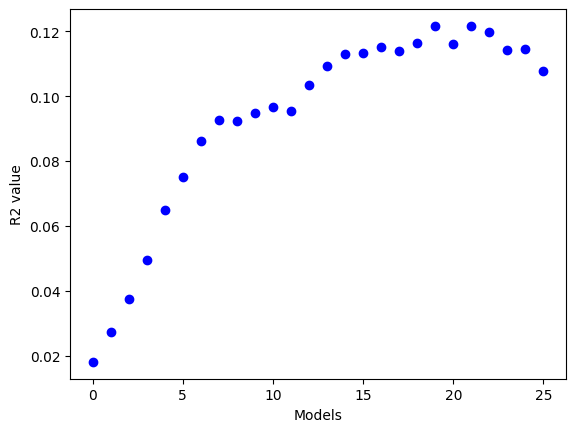

In [37]:
#plt.plot(rsquared_history)
plt.scatter(range(len(rsquared_history)), rsquared_history, marker='o', color='blue')


# Aggiunta di etichette agli assi
plt.xlabel('Models')
plt.ylabel('R2 value')


# Visualizzazione del grafico
plt.show()

In [38]:
features = ['Pedu', 'studytime', 'failures', 'gooutAlc', 'sex', 'addressInternet', 'famsize', 'schoolsup', 'higher', 'romantic', 'Mjob_health', 'Mjob_services', 'Mjob_teacher']

formula = 'G3 ~ '
for feature in features:
    formula += str(feature)+' + '    
formula = formula[:-3]

model = sm.OLS.from_formula(formula, data=df).fit()
model.summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     8.153
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           4.66e-14
Time:                        16:28:35   Log-Likelihood:                -891.00
No. Observations:                 317   AIC:                             1810.
Df Residuals:                     303   BIC:                             1863.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.8889      1.275      6.970      0.000       6.379      11.398
Pedu                0.5697      0.290      1.964      0.050      -0.001       1.140
studytime           0.5042      0.254      1.986      0.048       0.005       1.004
failures           -1.3959      0.278     -5.030      0.000      -1.942      -0.850
gooutAlc           -0.4383      0.235     -1.862      0.064      -0.901       0.025
sex                 1.0354      0.507      2.044      0.042       0.039       2.032
addressInternet     1.0168      0.519      1.960      0.051      -0.004       2.038
famsize            -0.8687      0.510     -1.703      0.089      -1.872       0.135
schoolsup          -1.5265      0.729     -2.094      0.037      -2.961      -0.092
higher              1.3007      1.085      1.199      0.232      -0.834       3.436
romantic           -1.2116      0.502     -2.414      0.016      -2.199      -0.224
Mjob_health         1.5158      0.993      1.527      0.128      -0.438       3.470
Mjob_services       1.2438      0.589      2.110      0.036       0.084       2.404
Mjob_teacher       -1.1824      0.798     -1.482      0.139      -2.752       0.388
==============================================================================
Omnibus:                       35.028   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.182
Skew:                          -0.817   Prob(JB):                     2.55e-10
Kurtosis:                       3.822   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regularization

In [39]:

model = LinearRegression()

mse = cross_val_score(model, X[features], y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X[features], y, cv=8, scoring='r2')

print(f"Linear Regression: \tMSE: {mse.mean()} \tR2: {r2.mean()}")


Linear Regression: 	MSE: -18.087597631273965 	R2: 0.11322018338269296


In [40]:
for alpha in [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 10, 100, 200, 500, 1000]:

    model = Ridge(alpha=alpha)
    mse = cross_val_score(model, X[features], y, cv=8, scoring='neg_mean_squared_error')
    r2 = cross_val_score(model, X[features], y, cv=8, scoring='r2')
    print(f"Ridge Regression {alpha}: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

# best value is 100


Ridge Regression 0.01: 	MSE: -18.087117045608313 	R2: 0.1132502949739115
Ridge Regression 0.02: 	MSE: -18.086637344808324 	R2: 0.11328036040081474
Ridge Regression 0.05: 	MSE: -18.085203529641483 	R2: 0.11337028078942776
Ridge Regression 0.1: 	MSE: -18.08283133119602 	R2: 0.11351923496983006
Ridge Regression 0.5: 	MSE: -18.06461090172617 	R2: 0.11467127548681195
Ridge Regression 1: 	MSE: -18.043591347036724 	R2: 0.11601918039904684
Ridge Regression 2: 	MSE: -18.006624958878025 	R2: 0.11844693470968046
Ridge Regression 10: 	MSE: -17.85215469958127 	R2: 0.1301875039182286
Ridge Regression 100: 	MSE: -18.170688526420857 	R2: 0.1329238322335178
Ridge Regression 200: 	MSE: -18.63982938220242 	R2: 0.11691935335679235
Ridge Regression 500: 	MSE: -19.567766266690995 	R2: 0.07926658270815543
Ridge Regression 1000: 	MSE: -20.351770518462317 	R2: 0.04495718813595395


In [41]:
for alpha in [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 10, 100, 200, 500, 1000]:

    model = Lasso(alpha=alpha)
    mse = cross_val_score(model, X[features], y, cv=8, scoring='neg_mean_squared_error')
    r2 = cross_val_score(model, X[features], y, cv=8, scoring='r2')
    print(f"Lasso Regression {alpha}: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

# best value is 0.02

Lasso Regression 0.01: 	MSE: -18.0955563152692 	R2: 0.114360203715619
Lasso Regression 0.02: 	MSE: -18.12084172475374 	R2: 0.11462574014657302
Lasso Regression 0.05: 	MSE: -18.270402598480885 	R2: 0.11153069990242914
Lasso Regression 0.1: 	MSE: -18.57529192965181 	R2: 0.10273301944107371
Lasso Regression 0.5: 	MSE: -19.499778517114386 	R2: 0.07448754005803356
Lasso Regression 1: 	MSE: -20.292569726832596 	R2: 0.04568386624011972
Lasso Regression 2: 	MSE: -22.020576274196017 	R2: -0.03114964777584156
Lasso Regression 10: 	MSE: -22.020576274196017 	R2: -0.03114964777584156
Lasso Regression 100: 	MSE: -22.020576274196017 	R2: -0.03114964777584156
Lasso Regression 200: 	MSE: -22.020576274196017 	R2: -0.03114964777584156
Lasso Regression 500: 	MSE: -22.020576274196017 	R2: -0.03114964777584156
Lasso Regression 1000: 	MSE: -22.020576274196017 	R2: -0.03114964777584156


In [42]:
model = Lasso(alpha=0.02)
model.fit(X, y)
model.coef_

array([-0.29553538,  0.43371421, -0.09898889,  0.46558743, -1.385758  ,
        0.26214492, -0.38208539, -0.19807218,  0.85492565,  0.77947434,
       -0.86847636,  0.51793064, -1.516625  ,  0.16464243, -0.59320881,
        0.6069646 , -1.0571554 , -0.29558312,  1.30259091,  1.12725536,
       -0.99759212,  0.3246138 , -0.        , -0.08862717,  0.88662754,
       -0.20355869, -0.18136185, -0.        ])

In [43]:
for alpha in [50, 75, 100, 125, 150, 175, 200]:
    for l1_ratio in [0.0005, 0.001, 0.005, 0.01]:

        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        mse = cross_val_score(model, X[features], y, cv=8, scoring='neg_mean_squared_error')
        r2 = cross_val_score(model, X[features], y, cv=8, scoring='r2')
        print(f"ElasticNet Regression {alpha} \t{l1_ratio}: \tMSE: {mse.mean()} \tR2: {r2.mean()}")


ElasticNet Regression 50 	0.0005: 	MSE: -21.847900594543002 	R2: -0.02315216574503566
ElasticNet Regression 50 	0.001: 	MSE: -21.853304554870146 	R2: -0.023400449229186604
ElasticNet Regression 50 	0.005: 	MSE: -21.892523969280006 	R2: -0.025200303829682164
ElasticNet Regression 50 	0.01: 	MSE: -21.930960085176583 	R2: -0.026973953678276097
ElasticNet Regression 75 	0.0005: 	MSE: -21.90589587195459 	R2: -0.02583525589958137
ElasticNet Regression 75 	0.001: 	MSE: -21.91141854502515 	R2: -0.02608921103687427
ElasticNet Regression 75 	0.005: 	MSE: -21.948354836130193 	R2: -0.02778778334592008
ElasticNet Regression 75 	0.01: 	MSE: -21.978575200036108 	R2: -0.029196811084533397
ElasticNet Regression 100 	0.0005: 	MSE: -21.935447342917413 	R2: -0.02720330759374749
ElasticNet Regression 100 	0.001: 	MSE: -21.94099669554612 	R2: -0.027458695451516038
ElasticNet Regression 100 	0.005: 	MSE: -21.975269325830297 	R2: -0.029037354926492412
ElasticNet Regression 100 	0.01: 	MSE: -22.000027696318813

## PCA components

In [44]:
import numpy as np

from sklearn.decomposition import PCA

### Full dataset

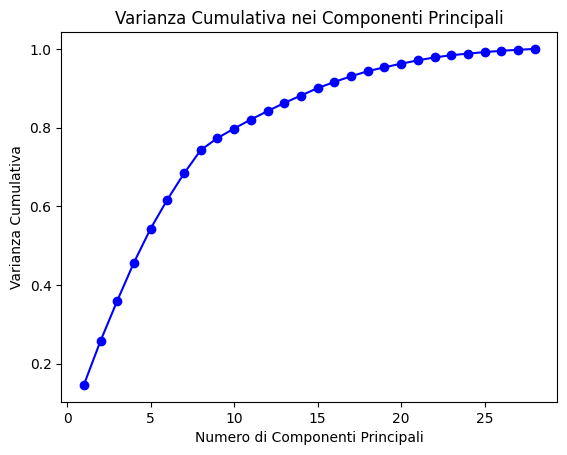

In [45]:
pca = PCA()
pca_result = pca.fit_transform(X)

# Creazione del grafico con le varianze cumulative
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

pca_result.shape
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Varianza Cumulativa nei Componenti Principali')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Cumulativa')
plt.show()

In [46]:
X_pca = pca_result[:,:7]

In [47]:

model = LinearRegression()

mse = cross_val_score(model, X_pca, y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X_pca, y, cv=8, scoring='r2')

print(f"Linear Regression: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Linear Regression: 	MSE: -19.35710113500891 	R2: 0.06883574776322338


In [48]:
model = Ridge(alpha=100)

mse = cross_val_score(model, X_pca, y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X_pca, y, cv=8, scoring='r2')

print(f"Ridge Regression {alpha}: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Ridge Regression 200: 	MSE: -19.18059602833271 	R2: 0.08471665208980707


### Selected features

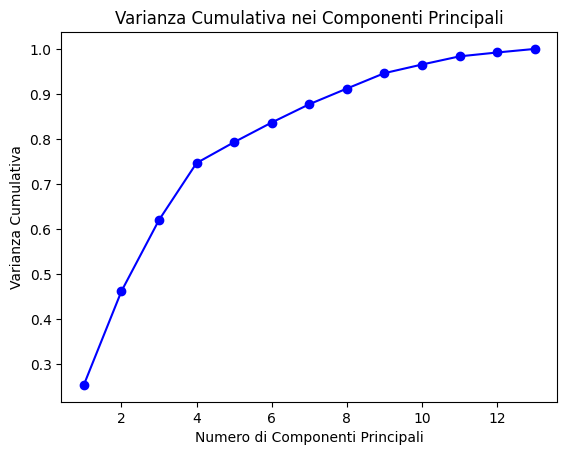

In [49]:
pca = PCA()
pca_result = pca.fit_transform(X[features])

# Creazione del grafico con le varianze cumulative
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

pca_result.shape
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Varianza Cumulativa nei Componenti Principali')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Cumulativa')
plt.show()

In [50]:
X_pca = pca_result[:,:3]

In [51]:

model = LinearRegression()

mse = cross_val_score(model, X_pca, y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X_pca, y, cv=8, scoring='r2')

print(f"Linear Regression: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Linear Regression: 	MSE: -19.211104796378727 	R2: 0.08747178615881984


In [52]:
model = Ridge(alpha=100)

mse = cross_val_score(model, X_pca, y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X_pca, y, cv=8, scoring='r2')

print(f"Ridge Regression {alpha}: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Ridge Regression 200: 	MSE: -19.218921244074416 	R2: 0.0919755916471174


# Trees Model Regressions

## Import Data

In [53]:
df = pd.read_csv('train_df.csv')
df.head()

,age,Pedu,traveltime,studytime,failures,famrel,gooutAlc,health,sex,addressInternet,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,G3
0,1.021751,-0.940091,-0.642435,-1.233786,0.895343,-1.053136,1.570863,1.039751,1,1,...,1,0,0,0,1,0,0,0,0,8
1,0.238078,-0.940091,-0.642435,-0.042232,-0.449374,0.062115,1.570863,0.320484,1,1,...,0,0,0,0,0,0,0,1,0,13
2,0.238078,-0.940091,0.791247,-0.042232,-0.449374,0.062115,0.657033,1.039751,0,1,...,1,0,0,0,0,0,1,0,0,12
3,-0.545595,1.024650,-0.642435,-1.233786,-0.449374,-1.053136,-1.170628,1.039751,1,1,...,0,1,0,0,0,1,1,0,0,0
4,1.805423,-1.922461,-0.642435,-0.042232,0.895343,0.062115,-0.256798,-0.398784,0,1,...,0,0,0,0,0,0,0,0,1,10


In [54]:
X = df.drop(['G3'], axis = 1)
y = df[['G3']]

## Decision Tree

In [55]:
model = DecisionTreeRegressor()

mse = cross_val_score(model, X, y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X, y, cv=8, scoring='r2')

print(f"Decision Tree: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Decision Tree: 	MSE: -46.105528846153845 	R2: -1.1641104787181968


In [56]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.01, 0.05],
    'ccp_alpha': [0.0, 0.01, 0.05]
}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=8, scoring = 'r2')
grid_search.fit(X, y)


grid_search.best_params_


{'ccp_alpha': 0.0,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [57]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [1,2,3,4],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1, 0.15],
    'ccp_alpha': [0.0, 0.01]
}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=8, scoring = 'r2')
grid_search.fit(X, y)


grid_search.best_params_

{'ccp_alpha': 0.0,
 'max_depth': 1,
 'max_features': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [58]:
model = DecisionTreeRegressor(
        max_depth = 1,
        max_features = None,
        min_samples_leaf = 1,
        min_samples_split = 4,
        min_impurity_decrease = 0.0,
        ccp_alpha= 0.0,)

mse = cross_val_score(model, X, y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X, y, cv=8, scoring='r2')

print(f"Decision Tree: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Decision Tree: 	MSE: -19.17128234542287 	R2: 0.09058720982513556


Here we try the same model but using feature selected in the backward eliminaiton unsing linear models: here we can see that we obtain the same result as the previous model!

In [59]:
features = ['Pedu', 'studytime', 'failures', 'gooutAlc', 'sex', 'addressInternet', 'famsize', 'schoolsup', 'higher', 'romantic', 'Mjob_health', 'Mjob_services', 'Mjob_teacher']
model = DecisionTreeRegressor(
        max_depth = 1,
        max_features = None,
        min_samples_leaf = 1,
        min_samples_split = 4,
        min_impurity_decrease = 0.0,
        ccp_alpha= 0.0,)

mse = cross_val_score(model, X[features], y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X[features], y, cv=8, scoring='r2')

print(f"Decision Tree: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

# Embedded feature selection!

Decision Tree: 	MSE: -19.17128234542287 	R2: 0.09058720982513556


## Random Forest

In [60]:

model = RandomForestRegressor()

mse = cross_val_score(model, X, y.values.ravel(), cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X, y.values.ravel(), cv=8, scoring='r2')

print(f"Random Forest: \tMSE: {mse.mean()} \tR2: {r2.mean()}")



Random Forest: 	MSE: -19.879027909515223 	R2: 0.005381168884068255


In [61]:
model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring = 'r2')
grid_search.fit(X, y.values.ravel())

grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 50}

In [62]:
model = RandomForestRegressor(
    max_depth = 40,
    max_features = 'log2',
    min_samples_leaf = 2,
    min_samples_split = 10,
    n_estimators = 50
)

mse = cross_val_score(model, X, y.values.ravel(), cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X, y.values.ravel(), cv=8, scoring='r2')

print(f"Random Forest: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Random Forest: 	MSE: -18.492609394187205 	R2: 0.09454771914592691


## Gradient Boosting

In [63]:
model = GradientBoostingRegressor()

mse = cross_val_score(model, X, y.values.ravel(), cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X, y.values.ravel(), cv=8, scoring='r2')

print(f"Gradient Boosting: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Gradient Boosting: 	MSE: -22.37861796812385 	R2: -0.08236497991683396


In [64]:
model = GradientBoostingRegressor()


param_grid = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring = 'r2')
grid_search.fit(X, y.values.ravel())

print(grid_search.best_score_)
print(grid_search.best_params_)

0.12435647789339535
{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [65]:
model = GradientBoostingRegressor(
    learning_rate = 0.01,
    max_depth = 5,
    max_features = 'log2',
    min_samples_leaf = 4,
    min_samples_split = 2,
    n_estimators = 200
)

mse = cross_val_score(model, X, y.values.ravel(), cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X, y.values.ravel(), cv=8, scoring='r2')

print(f"Gradient Boosting: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Gradient Boosting: 	MSE: -18.78548748924715 	R2: 0.10629415095085651


In [66]:
model = GradientBoostingRegressor(
    learning_rate = 0.01,
    max_depth = 3,
    max_features = 'log2',
    min_samples_leaf = 4,
    min_samples_split = 2,
    n_estimators = 200
)

mse = cross_val_score(model, X, y.values.ravel(), cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X, y.values.ravel(), cv=8, scoring='r2')

print(f"Gradient Boosting: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Gradient Boosting: 	MSE: -18.97164042882826 	R2: 0.10245739609195618


## PCA components

In [67]:
import numpy as np

from sklearn.decomposition import PCA

### Full dataset

In [68]:
pca = PCA()
pca_result = pca.fit_transform(X)

In [69]:
X_pca = pca_result[:,:7]

In [70]:
model = GradientBoostingRegressor()


param_grid = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring = 'r2')
grid_search.fit(X_pca, y.values.ravel())

print(grid_search.best_score_)
print(grid_search.best_params_)

0.08309411532746207
{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [71]:
model = GradientBoostingRegressor(
    learning_rate = 0.01,
    max_depth = 3,
    max_features = 'sqrt',
    min_samples_leaf = 4,
    min_samples_split = 10,
    n_estimators = 100
)

mse = cross_val_score(model, X_pca, y.values.ravel(), cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X_pca, y.values.ravel(), cv=8, scoring='r2')

print(f"Gradient Boosting: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Gradient Boosting: 	MSE: -20.135582802002496 	R2: 0.04976886366797442


# Catboost

## Import Data

In [72]:
df = pd.read_csv('train_df.csv')
df.head()

,age,Pedu,traveltime,studytime,failures,famrel,gooutAlc,health,sex,addressInternet,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,G3
0,1.021751,-0.940091,-0.642435,-1.233786,0.895343,-1.053136,1.570863,1.039751,1,1,...,1,0,0,0,1,0,0,0,0,8
1,0.238078,-0.940091,-0.642435,-0.042232,-0.449374,0.062115,1.570863,0.320484,1,1,...,0,0,0,0,0,0,0,1,0,13
2,0.238078,-0.940091,0.791247,-0.042232,-0.449374,0.062115,0.657033,1.039751,0,1,...,1,0,0,0,0,0,1,0,0,12
3,-0.545595,1.024650,-0.642435,-1.233786,-0.449374,-1.053136,-1.170628,1.039751,1,1,...,0,1,0,0,0,1,1,0,0,0
4,1.805423,-1.922461,-0.642435,-0.042232,0.895343,0.062115,-0.256798,-0.398784,0,1,...,0,0,0,0,0,0,0,0,1,10


In [73]:
X = df.drop(['G3'], axis = 1)
y = df[['G3']]

## Model

In [74]:
model = CatBoostRegressor(iterations=500, depth=10, learning_rate=0.05, loss_function='RMSE')
model.fit(X, y, verbose=100)


0:	learn: 4.6434800	total: 57.9ms	remaining: 28.9s
100:	learn: 2.0478722	total: 907ms	remaining: 3.58s
200:	learn: 0.9164319	total: 1.85s	remaining: 2.75s
300:	learn: 0.4564437	total: 2.78s	remaining: 1.84s
400:	learn: 0.2679980	total: 3.67s	remaining: 905ms
499:	learn: 0.1760712	total: 4.57s	remaining: 0us


In [75]:
model = CatBoostRegressor(iterations=500, depth=15, learning_rate=0.05, loss_function='RMSE', verbose = 100)

mse = cross_val_score(model, X, y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X, y, cv=8, scoring='r2')

print(f"CatBoost: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

0:	learn: 4.6389251	total: 215us	remaining: 108ms
100:	learn: 1.5992206	total: 18.9s	remaining: 1m 17s
200:	learn: 0.5016467	total: 47.7s	remaining: 1m 12s
300:	learn: 0.1936488	total: 1m 18s	remaining: 52.4s
400:	learn: 0.1353079	total: 1m 47s	remaining: 26.9s
499:	learn: 0.1282804	total: 2m 16s	remaining: 0us
0:	learn: 4.6174326	total: 273us	remaining: 136ms
100:	learn: 1.5820103	total: 18.7s	remaining: 1m 18s
200:	learn: 0.4677910	total: 48s	remaining: 1m 13s
300:	learn: 0.1364049	total: 1m 17s	remaining: 52.2s
400:	learn: 0.0406655	total: 1m 46s	remaining: 26.8s
499:	learn: 0.0122528	total: 2m 16s	remaining: 0us
0:	learn: 4.5796218	total: 69.4ms	remaining: 34.6s
100:	learn: 1.5650043	total: 19.1s	remaining: 1m 15s
200:	learn: 0.4762091	total: 47.7s	remaining: 1m 10s
300:	learn: 0.1440419	total: 1m 17s	remaining: 51.4s
400:	learn: 0.0438745	total: 1m 47s	remaining: 26.6s
499:	learn: 0.0140560	total: 2m 16s	remaining: 0us
0:	learn: 4.7710517	total: 209us	remaining: 104ms
100:	learn: 

## Subset of features

In [76]:
features = ['Pedu', 'studytime', 'failures', 'gooutAlc', 'sex', 'addressInternet', 'famsize', 'schoolsup', 'higher', 'romantic', 'Mjob_health', 'Mjob_services', 'Mjob_teacher']

model = CatBoostRegressor(verbose = 100)

param_grid = {
    'iterations': [500, 1000],
    'depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'loss_function': ['RMSE'],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring = 'r2')
grid_search.fit(X[features], y.values.ravel())

print(grid_search.best_score_)
print(grid_search.best_params_)


0:	learn: 4.6521064	total: 1.2ms	remaining: 597ms
100:	learn: 4.1761392	total: 44.8ms	remaining: 177ms
200:	learn: 3.9182174	total: 82ms	remaining: 122ms
300:	learn: 3.7298063	total: 118ms	remaining: 78ms
400:	learn: 3.5828691	total: 157ms	remaining: 38.7ms
499:	learn: 3.4588259	total: 197ms	remaining: 0us
0:	learn: 4.6694025	total: 477us	remaining: 238ms
100:	learn: 4.1937219	total: 37.8ms	remaining: 149ms
200:	learn: 3.9435223	total: 75.4ms	remaining: 112ms
300:	learn: 3.7501832	total: 115ms	remaining: 75.9ms
400:	learn: 3.5952420	total: 161ms	remaining: 39.7ms
499:	learn: 3.4664895	total: 200ms	remaining: 0us
0:	learn: 4.7964663	total: 557us	remaining: 278ms
100:	learn: 4.2776805	total: 38.5ms	remaining: 152ms
200:	learn: 3.9845844	total: 75.6ms	remaining: 113ms
300:	learn: 3.7579625	total: 115ms	remaining: 76.4ms
400:	learn: 3.5897251	total: 156ms	remaining: 38.5ms
499:	learn: 3.4440249	total: 196ms	remaining: 0us
0:	learn: 4.6637444	total: 437us	remaining: 218ms
100:	learn: 4.1659

KeyboardInterrupt: 